In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


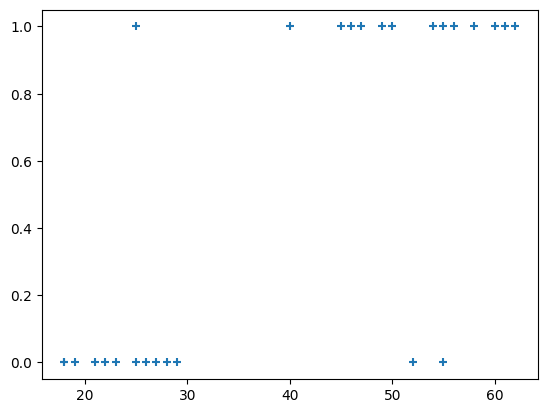

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.15)

In [25]:
X_train

,age
7,60
11,28
13,29
12,27
22,40
24,50
21,26
6,55
9,61
20,21


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
X_test

,age
14,49
26,23
19,18
3,52
5,56


In [32]:
model.predict(X_test)

array([1, 0, 0, 1, 1])

In [31]:
model.predict([[36]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [33]:
model.predict_proba(X_test)

array([[0.13638356, 0.86361644],
       [0.887424  , 0.112576  ],
       [0.94357082, 0.05642918],
       [0.09138402, 0.90861598],
       [0.05223051, 0.94776949]])

# **Exercise**

In [3]:
new_df = pd.read_csv('HR_comma_sep.csv')
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Average numbers for all columns**

In [4]:
new_df.groupby('left').mean()

<ipython-input-4-d6361f32c191>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# **Conclusions**
Satisfaction level is low in employees leaving the firm.

Average monthly hours are higher in employees leaving the company.

If promotion is given then employees aren't leaving the company.

**Impact of employee salaries on retention**

<Axes: xlabel='salary'>

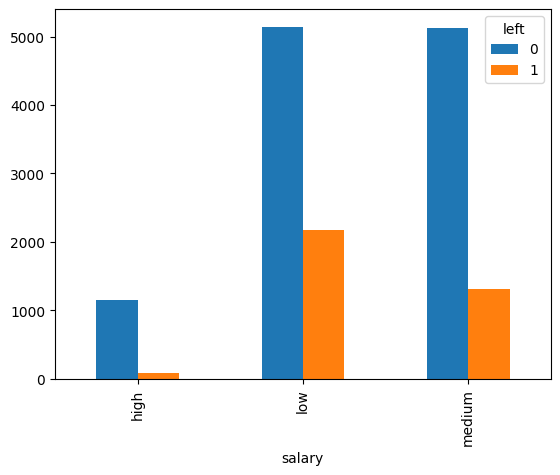

In [5]:
pd.crosstab(new_df.salary,new_df.left).plot(kind='bar')

**Department wise employee retention rate**

<Axes: xlabel='Department'>

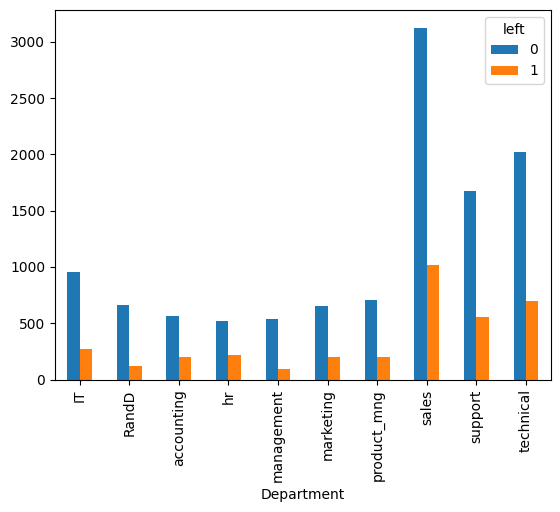

In [6]:
pd.crosstab(new_df.Department,new_df.left).plot(kind='bar')

we will use following as independant variables in our model
**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [7]:
subdf = new_df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable using One Hot Encoding**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Remove the salary column in text as it is replaced by dummy values <br>
inplace=True (means that changes will be applied to original data)

In [10]:
df_dummies.drop('salary',axis='columns',inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [12]:
X = df_dummies
Y = new_df.left

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

**Accuracy of Model**

In [17]:
model.score(X_test,y_test)

0.7775238095238095